In [21]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
import tempfile
import seaborn as sns
sns.set(style="darkgrid")
import random

plt.rc('font', size=24, family='serif')
plt.style.use('tableau-colorblind10')
%matplotlib inline
sns.set(rc={'figure.figsize':(10,8)})

import logging
logging.getLogger().setLevel(logging.INFO)

from banditpylib import trials_to_dataframe
from banditpylib.arms import BernoulliArm, GaussianArm
from banditpylib.bandits import MultiArmedBandit
from banditpylib.protocols import SinglePlayerProtocol
from banditpylib.learners.mab_learner import UCB, EpsGreedy, ThompsonSampling, ExploreThenCommit, ExploreThenCommitBatch, UCBV, MOSS

### Bernoulli Arms

In [121]:
horizon = 5000
means = np.array([0.3, 0.5, 0.7])
arms = [BernoulliArm(mean) for mean in means]
bandit = MultiArmedBandit(arms=arms)
learners = [ExploreThenCommit(arm_num=len(arms), T_prime=500, name='Explore Then Commit'),
            ExploreThenCommitBatch(arm_num=len(arms), T_prime=500, name='Explore Then Commit Batch'),
            EpsGreedy(arm_num=len(arms), name='Epsilon Greedy'), 
            UCB(arm_num=len(arms), name='UCB'),
            ThompsonSampling(arm_num=len(arms), name='Thompson Sampling')
#             MOSS(arm_num=len(arms), horizon=horizon, name='MOSS')
           
           ]

# Report intermediate regrets after these horizons
intermediate_horizons = list(range(0, horizon+1, 50))
temp_file = tempfile.NamedTemporaryFile()

In [122]:
game = SinglePlayerProtocol(bandit, learners)
# Start playing the game
# Add `debug=True` for debugging purpose
game.play(200, temp_file.name, intermediate_horizons=intermediate_horizons, horizon=horizon, debug=True)

INFO:absl:start Explore Then Commit's play with multi_armed_bandit
INFO:absl:Explore Then Commit's play with multi_armed_bandit runs 1.67 seconds.
INFO:absl:start Explore Then Commit Batch's play with multi_armed_bandit
INFO:absl:Explore Then Commit Batch's play with multi_armed_bandit runs 1.56 seconds.
INFO:absl:start Epsilon Greedy's play with multi_armed_bandit
INFO:absl:Epsilon Greedy's play with multi_armed_bandit runs 1.54 seconds.
INFO:absl:start UCB's play with multi_armed_bandit
INFO:absl:UCB's play with multi_armed_bandit runs 1.70 seconds.
INFO:absl:start Thompson Sampling's play with multi_armed_bandit
INFO:absl:Thompson Sampling's play with multi_armed_bandit runs 1.78 seconds.


In [123]:
trials_df = trials_to_dataframe(temp_file.name)
trials_df.head()

,rounds,total_actions,regret,other,bandit,learner
0,0,0,0.0,0.0,multi_armed_bandit,Explore Then Commit
1,50,50,7.0,0.0,multi_armed_bandit,Explore Then Commit
2,100,100,20.0,0.0,multi_armed_bandit,Explore Then Commit
3,150,150,32.0,0.0,multi_armed_bandit,Explore Then Commit
4,200,200,36.0,0.0,multi_armed_bandit,Explore Then Commit


<AxesSubplot: xlabel='total_actions', ylabel='regret'>

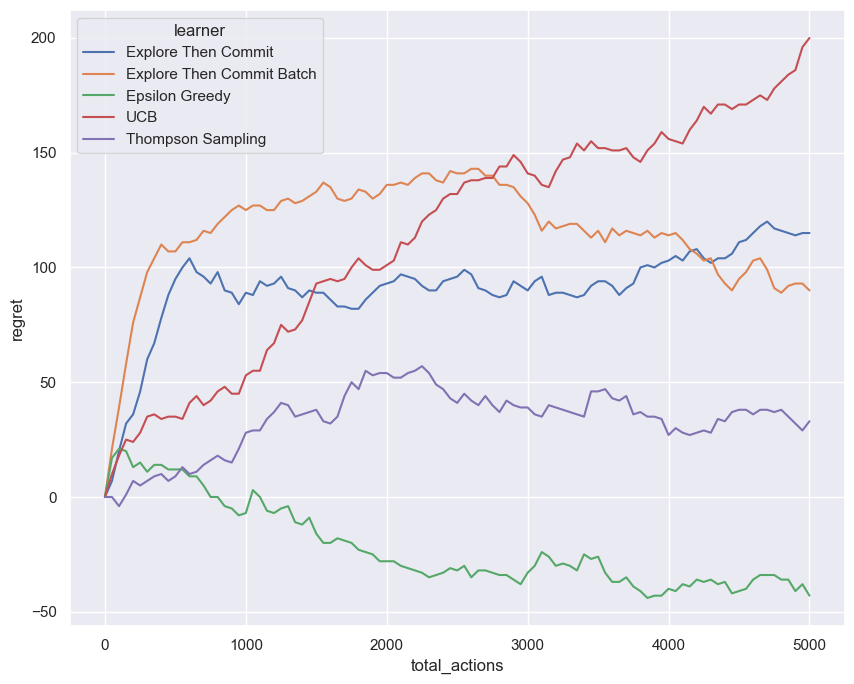

In [124]:
sns.lineplot(x='total_actions', y='regret', hue='learner', data=trials_df)

### Gaussian Arms

In [99]:
#ThompsonSampling?

In [116]:
horizon = 5000

means = [0.3, 0.5, 0.7] #[((i/5)**0.5) for i in range(1,5)]
#random.shuffle(means)
#print(means)

arms = [GaussianArm(mu=mean, std=1) for mean in means]
bandit = MultiArmedBandit(arms=arms)
learners = [ExploreThenCommit(arm_num=len(arms), T_prime=500, name='Explore Then Commit'),
            ExploreThenCommit(arm_num=len(arms), T_prime=500, name='Explore Then Commit Batch'),
            EpsGreedy(arm_num=len(arms), name='Epsilon Greedy'), 
            UCB(arm_num=len(arms), name='UCB'),
            ThompsonSampling(arm_num=len(arms), prior_dist='gaussian', name='Thompson Sampling')]
#             MOSS(arm_num=len(arms), horizon=horizon, name='MOSS')]
# Report intermediate regrets after these horizons
intermediate_horizons = list(range(0, horizon+1, 50))
temp_file = tempfile.NamedTemporaryFile()

In [117]:
#game.play?


In [118]:
game = SinglePlayerProtocol(bandit, learners)
# Start playing the game
# Add `debug=True` for debugging purpose
game.play(100, temp_file.name, intermediate_horizons=intermediate_horizons, horizon=horizon, debug=True)

INFO:absl:start Explore Then Commit's play with multi_armed_bandit
INFO:absl:Explore Then Commit's play with multi_armed_bandit runs 1.56 seconds.
INFO:absl:start Explore Then Commit Batch's play with multi_armed_bandit
INFO:absl:Explore Then Commit Batch's play with multi_armed_bandit runs 1.46 seconds.
INFO:absl:start Epsilon Greedy's play with multi_armed_bandit
INFO:absl:Epsilon Greedy's play with multi_armed_bandit runs 1.62 seconds.
INFO:absl:start UCB's play with multi_armed_bandit
INFO:absl:UCB's play with multi_armed_bandit runs 1.64 seconds.
INFO:absl:start Thompson Sampling's play with multi_armed_bandit
INFO:absl:Thompson Sampling's play with multi_armed_bandit runs 1.45 seconds.


In [119]:
trials_df = trials_to_dataframe(temp_file.name)
trials_df.tail()

,rounds,total_actions,regret,other,bandit,learner
500,4800,4800,131.30315,0.0,multi_armed_bandit,Thompson Sampling
501,4850,4850,132.17440,0.0,multi_armed_bandit,Thompson Sampling
502,4900,4900,130.15495,0.0,multi_armed_bandit,Thompson Sampling
503,4950,4950,131.68939,0.0,multi_armed_bandit,Thompson Sampling
504,5000,5000,135.85750,0.0,multi_armed_bandit,Thompson Sampling


<AxesSubplot: xlabel='total_actions', ylabel='regret'>

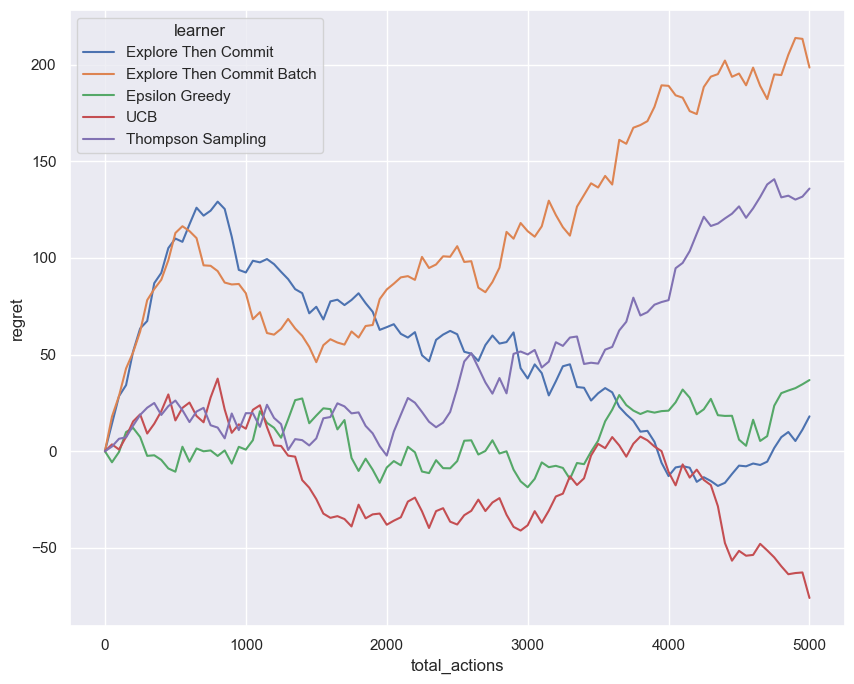

In [120]:
sns.lineplot(x='total_actions', y='regret', hue='learner', data=trials_df)